MANKENDALL TREND TEST STUFF

In [1]:
import pandas as pd
from scipy.stats import kendalltau
from scipy.stats import theilslopes
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step 1: Read the CSV file into a pandas DataFrame
data = pd.read_excel('MAXIMUM_TEMP_Tx.xlsx')
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,Tadi,Tarkwa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Year,Average,Average,FINAL AVERAGE FOR MANKENDALL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRIEF NOTE,NaN,NaN
2,NaN,NaN,1980,29.96284,23.331246,NaN,NaN,NaN,NaN,NaN,NaN,"Since there are missing data, that's why I did...",NaN,NaN,NaN,NaN
3,NaN,NaN,1981,30.044544,30.459618,NaN,NaN,NaN,NaN,NaN,NaN,Could you kindly fill the mising data ?,NaN,NaN,NaN,"All cells containg ""0"" is a missing data"
4,NaN,NaN,1982,27.453129,30.470903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,1983,30.490558,31.191082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,1984,31.033632,30.911141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MannKendall Trend Analysis should be done usin...,NaN,NaN,NaN
7,NaN,NaN,1985,24.421532,30.49084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Year,Final Average,NaN,NaN
8,NaN,NaN,1986,20.466116,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,1987,30.706425,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:

year = data['YEARS']
ASHANTI_RR = data['ASHA_RR']
CENTRAL_RR = data['CEN_RR']
EASTERN_RR = data['EAS_RR']
WESTERN_RR = data['WES_RR']

In [79]:
# Step 3: Perform the Mann-Kendall test for trend detection
tau, p_value = kendalltau(year, EASTERN_RR)


In [80]:
# Print the trend result
print("Mann-Kendall Test=")
print("Tau =", tau)
print("P-value =", p_value)

Mann-Kendall Test=
Tau = 0.03303303303303304
P-value = 0.7735493007734082


In [82]:
#Interpret the results
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("There is a significant trend in the WESTERN REGIONAL RAINFALL data.")
else:
    print("There is no significant trend in the WESTERN REGIONAL RAINFALL data.")


There is no significant trend in the WESTERN REGIONAL RAINFALL data.


In [83]:
# Step 4: Calculate the Theil-Sen estimator for the magnitude of warming
slope, intercept, _, _ = theilslopes(EASTERN_RR, year)

In [84]:
# Print the Theil-Sen estimator results
print("Theil-Sen Estimator:")
print("Slope:", slope)
print("Intercept:", intercept)


Theil-Sen Estimator:
Slope: 0.7894230769230367
Intercept: -248.1173076922273


In [85]:
# CALCULATING FOR COEEFICIENT OF VARIATION
cv = np.std(EASTERN_RR) / np.mean(EASTERN_RR)  
cv

0.20845331069976583

In [73]:
# Generate the linear regression line
slope, intercept = np.polyfit(year, EASTERN_RR, 1)
trend_line = slope * year + intercept


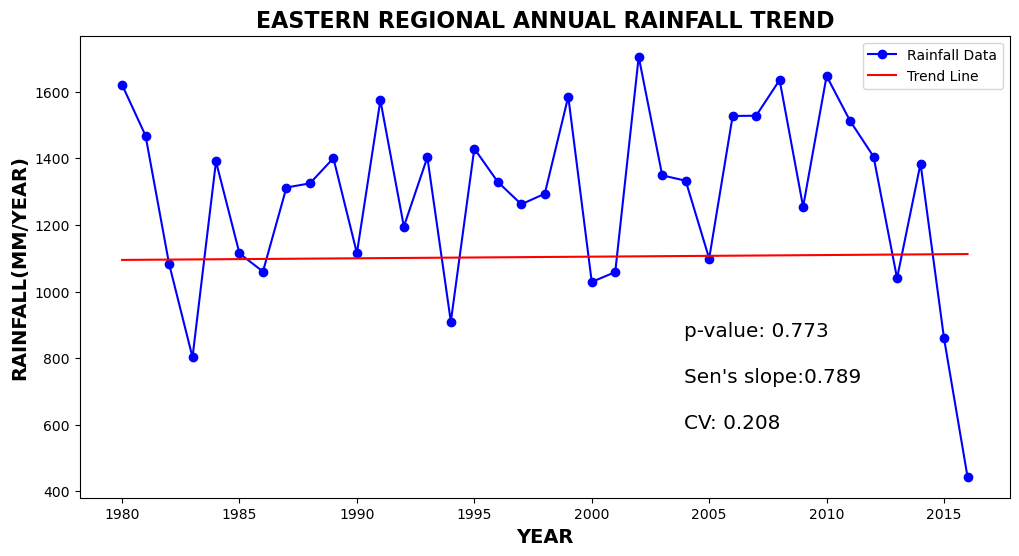

In [88]:
# Plot the data and the trend line
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(year, EASTERN_RR, color='b', label='Rainfall Data',marker='o')
plt.plot(year, trend_line, color='r', label='Trend Line')
plt.xlabel('YEAR', fontweight='bold', fontsize=14)
plt.ylabel('RAINFALL(MM/YEAR)', fontweight='bold', fontsize=14)
plt.title('EASTERN REGIONAL ANNUAL RAINFALL TREND', fontweight='bold', fontsize=16)
ax.text(0.65, 0.35, f'p-value: 0.773', transform=ax.transAxes, fontsize='x-large', color='black')
ax.text(0.65, 0.25, f"Sen's slope:0.789", transform=ax.transAxes, fontsize='x-large',color='black')
ax.text(0.65, 0.15, f'CV: 0.208', transform=ax.transAxes, fontsize='x-large',color='black')
plt.legend()
#plt.grid(True,color='b',linestyle='--')
plt.show()
fig.savefig('EASTERN_REGION', bbox_inches='tight', dpi=500)
